Version info
>v011 - deleted testing codes

>v013 - manipulating multiple beta

>v014 - Handling missing data

>v015 - Error fixing of v014

>v016 - Simplified version of v015

In [2]:
def cv(var):
    print("-------------------")
    print("itself:", var)
    if hasattr(var, 'type'):
        print(".type:", var.type)
    else:
        print(".type:", "no type attribute")
    print("type():", type(var))
    if hasattr(var, 'shape'):
        print("shape:", var.shape)
    else:
        print("shape:", "no shape attribute")
    print("-------------------")

**Environment setting**

In [3]:
import numpy as np
import pandas as pd
import theano
import pymc3 as pm
import matplotlib.pyplot as plt

%matplotlib inline

theano.config.compute_test_value = 'raise'

Using gpu device 0: GeForce GTX 750 (CNMeM is disabled)


**Data setting**

In [21]:
num_n = 6
num_p = 2
Y = np.array([10, 9, 8, 1, 2, 1])
X = np.array([[1,1],[1,0],[1,1],[0,0],[0,-999],[-999,0]])
#X = np.array([[1,1],[1,0],[1,1],[0,0],[0,1],[1,0]])

X_masked = np.ma.masked_array(X, mask=X==-999)

beta = np.empty(num_p, dtype=object)
X_imp = np.empty(num_p, dtype=object)

niter = 100

## v016_00

**with X and imputation w/o loop**

success without error

In [5]:
basic_model = pm.Model()
with basic_model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=100, shape=1) # Intercept
    for i in range(num_p): # beta0 to betaN
        beta[i] = pm.Normal('beta' + str(i), mu=0, sd=100, shape=1)
    sigma = pm.Uniform('sigma', lower=0, upper=20) # Std
    
    # refer to [https://github.com/pymc-devs/pymc3/blob/58f3f8e5d2a55edc5e05b33b239fa46631eff895/pymc3/examples/lasso_missing.py]
    #p_imp = pm.Beta('p_imp', 1, 1)
    #for i in range(num_p):
    #    X_imp[i] = pm.Bernoulli('X_imp' + str(i), p_imp, observed=np.ma.masked_values(X_masked[:,i], value=-999))

    p_imp = pm.Beta('p_imp', 1, 1)
    X_imp = pm.Bernoulli('X_imp', p_imp, observed=np.ma.masked_values(X_masked, value=-999))
    
    
    # Expected value of outcome
    #mu = alpha + beta[0]*X[:1,0] + beta[1]*X[:1,1]
    #mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]
    mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]

    #mu = alpha
    #for i in range(num_p):
    #    mu = mu + beta[i]*X_imp[:,i]
    
    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y)

In [7]:
cv(X)
cv(X[:,0])

-------------------
itself: [[   1    1]
 [   1    0]
 [   1    1]
 [   0    0]
 [   0    1]
 [-999    0]]
.type: no type attribute
type(): <class 'numpy.ndarray'>
shape: (6, 2)
-------------------
-------------------
itself: [   1    1    1    0    0 -999]
.type: no type attribute
type(): <class 'numpy.ndarray'>
shape: (6,)
-------------------


## v016_01

**with X and imputation w/ loop**

this fails with error

TypeError: expected type_num 9 (NPY_INT64) got 7

TypeError: unorderable types: int() < NoneType()

In [29]:
basic_model = pm.Model()
with basic_model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=100, shape=1) # Intercept
    for i in range(num_p): # beta0 to betaN
        beta[i] = pm.Normal('beta' + str(i), mu=0, sd=100, shape=1)
    sigma = pm.Uniform('sigma', lower=0, upper=20) # Std
    
    # refer to [https://github.com/pymc-devs/pymc3/blob/58f3f8e5d2a55edc5e05b33b239fa46631eff895/pymc3/examples/lasso_missing.py]
    p_imp = pm.Beta('p_imp', 1, 1)
    for i in range(num_p):
        X_imp[i] = pm.Bernoulli('X_imp' + str(i), p_imp, observed=np.ma.masked_values(X_masked[:,i], value=-999))
    
    # Expected value of outcome
    #mu = alpha + beta[0]*X[:1,0] + beta[1]*X[:1,1]
    #mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]
    mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]

    #mu = alpha
    #for i in range(num_p):
    #    mu = mu + beta[i]*X_imp[:,i]
    
    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y)

## v016_04

**with X_imp and imputation w/o loop**


error:   
Input dimension mis-match. (input[3].shape[0] = 6, input[4].shape[0] = 1)


In [9]:
basic_model = pm.Model()
with basic_model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=100, shape=1) # Intercept
    for i in range(num_p): # beta0 to betaN
        beta[i] = pm.Normal('beta' + str(i), mu=0, sd=100, shape=1)
    sigma = pm.Uniform('sigma', lower=0, upper=20) # Std
    
    # refer to [https://github.com/pymc-devs/pymc3/blob/58f3f8e5d2a55edc5e05b33b239fa46631eff895/pymc3/examples/lasso_missing.py]
    #p_imp = pm.Beta('p_imp', 1, 1)
    #for i in range(num_p):
    #    X_imp[i] = pm.Bernoulli('X_imp' + str(i), p_imp, observed=np.ma.masked_values(X_masked[:,i], value=-999))

    p_imp = pm.Beta('p_imp', 1, 1)
    X_imp = pm.Bernoulli('X_imp', p_imp, observed=np.ma.masked_values(X_masked, value=-999))
    
    
    # Expected value of outcome
    #mu = alpha + beta[0]*X[:1,0] + beta[1]*X[:1,1]
    #mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]
    mu = alpha + beta[0]*X_imp[:,0] + beta[1]*X_imp[:,1]

    #mu = alpha
    #for i in range(num_p):
    #    mu = mu + beta[i]*X_imp[:,i]
    
    # Likelihood
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y)

In [10]:
cv(X_imp)
cv(X_imp[:,0])

-------------------
itself: X_imp
.type: TensorType(int64, matrix)
type(): <class 'pymc3.model.ObservedRV'>
shape: Shape.0
-------------------
-------------------
itself: Subtensor{::, int64}.0
.type: TensorType(int64, vector)
type(): <class 'theano.tensor.var.TensorVariable'>
shape: Shape.0
-------------------


## v016_11

**with X_imp**   
Let's compaire v016_00 and v016_04. and I'll try to convert tensor variable to ndarray to make similar to v016_00.

In [22]:
basic_model = pm.Model()
with basic_model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=100, shape=1) # Intercept
    for i in range(num_p): # beta0 to betaN
        beta[i] = pm.Normal('beta' + str(i), mu=0, sd=100, shape=1)
    sigma = pm.Uniform('sigma', lower=0, upper=20) # Std
    
    # refer to [https://github.com/pymc-devs/pymc3/blob/58f3f8e5d2a55edc5e05b33b239fa46631eff895/pymc3/examples/lasso_missing.py]
    #p_imp = pm.Beta('p_imp', 1, 1)
    #for i in range(num_p):
    #    X_imp[i] = pm.Bernoulli('X_imp' + str(i), p_imp, observed=np.ma.masked_values(X_masked[:,i], value=-999))

    p_imp = pm.Beta('p_imp', 1, 1)
    X_imp = pm.Bernoulli('X_imp', p_imp, observed=np.ma.masked_values(X_masked, value=-999))
    
    
    # Expected value of outcome
    #mu = alpha + beta[0]*X[:1,0] + beta[1]*X[:1,1]
    #mu = alpha + beta[0]*X[:,0] + beta[1]*X[:,1]
    mu = alpha + beta[0]*X_imp[:,0] + beta[1]*X_imp[:,1]

    #mu = alpha
    #for i in range(num_p):
    #    mu = mu + beta[i]*X_imp[:,i]
    
    # Likelihood
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y)

In [23]:
with basic_model:
    # Obtaining starting values via MAP
    start = pm.find_MAP()

print(start)

{'p_imp_logodds': array(-0.2876820648503409), 'sigma_interval': array(0.0), 'beta0': array([ 0.]), 'beta1': array([ 0.]), 'X_imp_missing': array([0, 0], dtype=int64), 'alpha': array([ 0.])}


Assigned <class 'pymc3.step_methods.nuts.NUTS'> to alpha
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to beta0
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to beta1
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to sigma_interval
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to p_imp_logodds
Assigned <class 'pymc3.step_methods.metropolis.Metropolis'> to X_imp_missing
 [-----------------100%-----------------] 100 of 100 complete in 0.2 sec

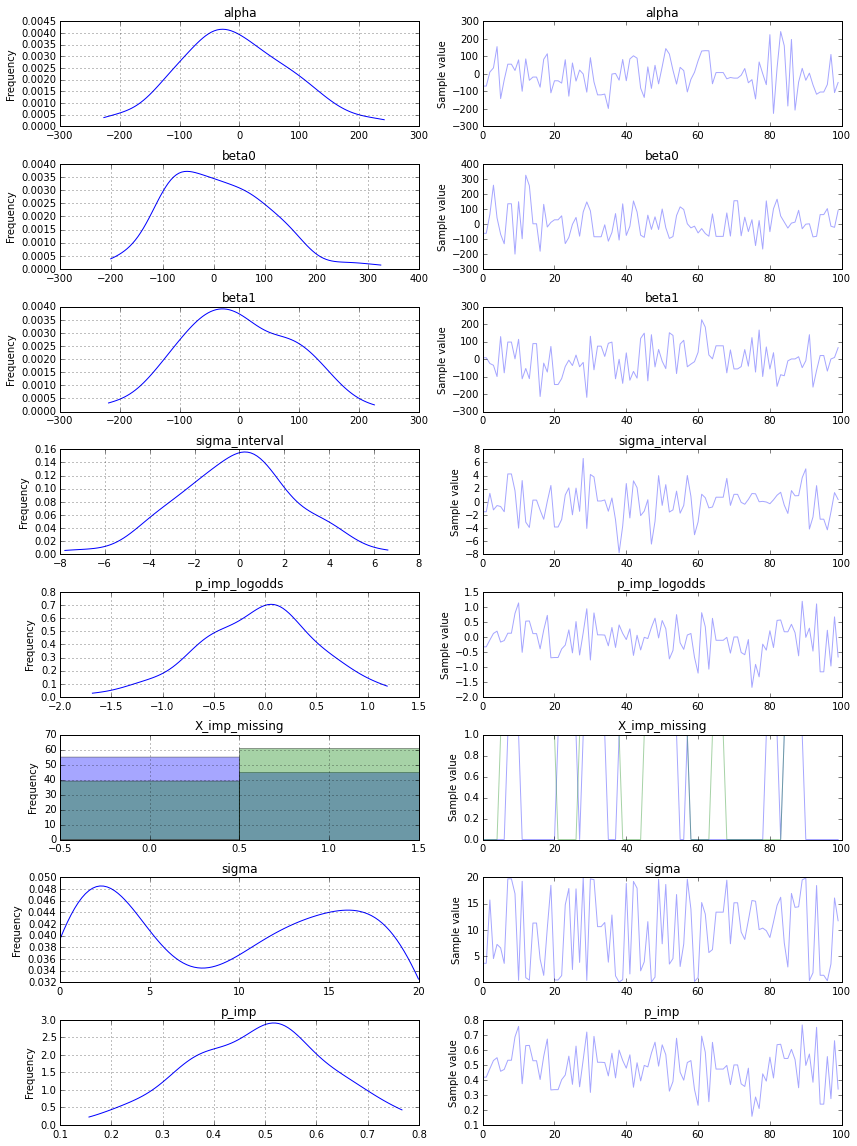

In [24]:
with basic_model:
    # Draw samples from posterior
    trace = pm.sample(niter, start=start, random_seed=2015, progressbar=True)
    
    # Ploting samples
    pm.traceplot(trace)

In [27]:
X_masked
len(trace.get_values('X_imp_missing'))
print(trace.get_values('X_imp_missing'))
trace.get_values('X_imp_missing')



#with basic_model:
    #likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=Y)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
-------------------
itself: [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1

### Checking working variables

In [28]:
cv(X)
cv(X[:0])
cv(X_imp)
cv(X_imp[0])
cv(X_imp[0][0])
cv(beta)
cv(beta[0])
cv(mu)
cv(Y)


-------------------
itself: [[   1    1]
 [   1    0]
 [   1    1]
 [   0    0]
 [   0 -999]
 [-999    0]]
.type: no type attribute
type(): <class 'numpy.ndarray'>
shape: (6, 2)
-------------------
-------------------
itself: []
.type: no type attribute
type(): <class 'numpy.ndarray'>
shape: (0, 2)
-------------------
-------------------
itself: X_imp
.type: TensorType(int64, matrix)
type(): <class 'pymc3.model.ObservedRV'>
shape: Shape.0
-------------------
-------------------
itself: Subtensor{int64}.0
.type: TensorType(int64, vector)
type(): <class 'theano.tensor.var.TensorVariable'>
shape: Shape.0
-------------------
-------------------
itself: Subtensor{int64}.0
.type: TensorType(int64, scalar)
type(): <class 'theano.tensor.var.TensorVariable'>
shape: Shape.0
-------------------
-------------------
itself: [beta0 beta1]
.type: no type attribute
type(): <class 'numpy.ndarray'>
shape: (2,)
-------------------
-------------------
itself: beta0
.type: TensorType(float64, (True,))
type

**Obtaining starting values via MAP**

In [30]:
with basic_model:
    # Obtaining starting values via MAP
    start = pm.find_MAP()

print(start)

{'beta1': array([ 1.66308512]), 'X_imp1_missing': array([], dtype=int64), 'beta0': array([ 0.00401288]), 'p_imp_logodds': array(0.0), 'sigma_interval': array(-1.5256206243094304), 'alpha': array([ 5.0001987]), 'X_imp0_missing': array([0], dtype=int64)}


**Sampling**

In [31]:
with basic_model:
    # Draw samples from posterior
    trace = pm.sample(niter, start=start, random_seed=2015, progressbar=True)
    
    # Ploting samples
    pm.traceplot(trace)

Assigned <class 'pymc3.step_methods.nuts.NUTS'> to alpha
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to beta0
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to beta1
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to sigma_interval
Assigned <class 'pymc3.step_methods.nuts.NUTS'> to p_imp_logodds
Assigned <class 'pymc3.step_methods.metropolis.Metropolis'> to X_imp0_missing
Assigned <class 'pymc3.step_methods.metropolis.Metropolis'> to X_imp1_missing


TypeError: unorderable types: int() < NoneType()